In [1]:
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset and sort by date to display
Pyber_df = pd.merge(city_df, ride_df).sort_values(by='date')
Pyber_df.head(5)

,city,driver_count,type,date,fare,ride_id
743,Liumouth,69,Urban,1/1/2018 0:08,37.91,5.673670e+12
1678,Colemanland,23,Suburban,1/1/2018 0:46,47.74,2.215910e+12
2023,South Brenda,1,Suburban,1/1/2018 12:32,25.56,2.613540e+12
1554,Williamsview,46,Urban,1/1/2018 14:40,5.42,5.676170e+12
1277,Valentineton,45,Urban,1/1/2018 14:42,12.31,4.757040e+12


In [2]:
#Separate city types
Rural_df = Pyber_df.loc[Pyber_df["type"]=="Rural", :].sort_values(by='city')
Suburban_df = Pyber_df.loc[Pyber_df["type"]=="Suburban", :].sort_values(by='city')
Urban_df = Pyber_df.loc[Pyber_df["type"]=="Urban", :].sort_values(by='city')

#Get drivers per city
Rural_drivers = Rural_df.groupby('city')["driver_count"].mean()
Suburban_drivers = Suburban_df.groupby('city')["driver_count"].mean()
Urban_drivers = Urban_df.groupby('city')["driver_count"].mean()

#Get rides in each city type
Rural_rides = Rural_df["city"].value_counts()
Suburban_rides = Suburban_df["city"].value_counts()
Urban_rides = Urban_df["city"].value_counts()

#Calculate average fares per city type
Avg_fare_rural = Rural_df.groupby('city')["fare"].mean().round(2)
Avg_fare_sub = Suburban_df.groupby('city')["fare"].mean().round(2)
Avg_fare_urb = Urban_df.groupby('city')["fare"].mean().round(2)

#build data frames with average fare, # of rides, and # of drivers
Rural_rides_df = pd.DataFrame({"Average Fare":Avg_fare_rural,
                               "Rides": Rural_rides,
                               "Drivers":Rural_drivers})
Suburban_rides_df = pd.DataFrame({"Average Fare":Avg_fare_sub,
                               "Rides": Suburban_rides,
                                "Drivers": Suburban_drivers})
Urban_rides_df = pd.DataFrame({"Average Fare":Avg_fare_urb,
                               "Rides": Urban_rides,
                               "Drivers":Urban_drivers})

## Bubble Plot of Ride Sharing Data

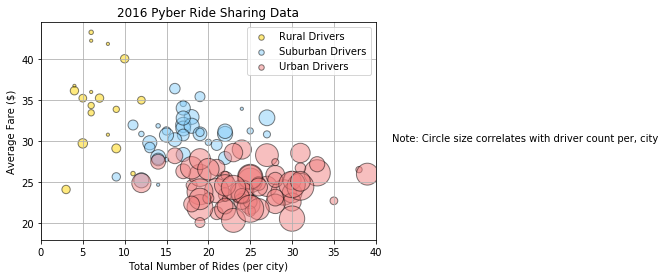

In [3]:
# Obtain the x and y coordinates for each of the three city types
x_rural = Rural_rides_df["Rides"]
y_rural = Rural_rides_df["Average Fare"]
x_sub = Suburban_rides_df["Rides"]
y_sub = Suburban_rides_df["Average Fare"]
x_urb = Urban_rides_df["Rides"]
y_urb = Urban_rides_df["Average Fare"]

plt.scatter(x_rural, y_rural, s=Rural_drivers*10, marker="o", alpha=.5, facecolors="gold", edgecolors="black", label="Rural Drivers")
plt.scatter(x_sub, y_sub, s=Suburban_drivers*10, marker="o", alpha=.5, facecolors="LightSkyBlue", edgecolors="black", label="Suburban Drivers")
plt.scatter(x_urb, y_urb, s=Urban_drivers*10, marker="o", alpha=.5, facecolors="LightCoral", edgecolors="black", label = "Urban Drivers")

# Build the scatter plots for each city types
plt.xlim(0, 40)
plt.grid()

# Incorporate the other graph properties
plt.title("2016 Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

# Create a legend
City_types = ['Rural','Suburban','Urban']
colors = ['gold','LightSkyBlue','LightCoral']

lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 30, "Note: Circle size correlates with driver count per, city")

# Save Figure
plt.savefig("Avg_fare_per_city.png")
plt.show()



## Total Fares by City Type

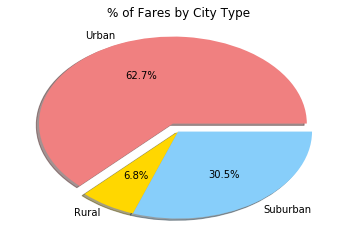

In [4]:
# Calculate Type 
Fare_rural = Rural_df["fare"].sum().round(2)
Fare_sub = Suburban_df["fare"].sum().round(2)
Fare_urb = Urban_df["fare"].sum().round(2)
Total_fares = Fare_rural + Fare_sub + Fare_urb
sizes = [100*Fare_urb/Total_fares, 100*Fare_rural/Total_fares, 100*Fare_sub/Total_fares]
plt.title("% of Fares by City Type")

labels = ["Urban", "Rural", "Suburban"]
colors = ["LightCoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

# Save Figure
plt.savefig("Fares_by_Type.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

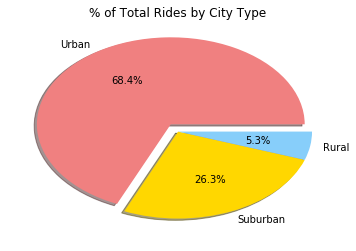

In [6]:
# Calculate Type 
Total_rides = Urban_rides.sum() + Suburban_rides.sum() + Rural_rides.sum()
sizes = [100*Urban_rides.sum()/Total_rides, 100*Suburban_rides.sum()/Total_rides, 100*Rural_rides.sum()/Total_rides]
labels = ["Urban", "Suburban", "Rural"]
colors = ["LightCoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.title("% of Total Rides by City Type")

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

# Save Figure
plt.savefig("Rides_by_Type.png")
plt.show()

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

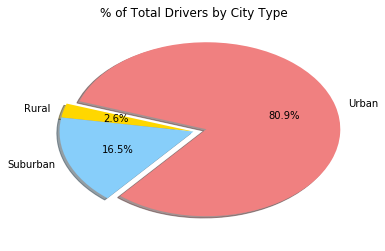

In [8]:
# Calculate Driver Percents
Rural_drivers_df = city_df.loc[city_df["type"]=="Rural",:]
Rural_drivers_ct = Rural_drivers_df["driver_count"].sum()
Sub_drivers_df = city_df.loc[city_df["type"]=="Suburban",:]
Sub_drivers_ct = Sub_drivers_df["driver_count"].sum()
Urb_drivers_df = city_df.loc[city_df["type"]=="Urban",:]
Urb_drivers_ct = Urb_drivers_df["driver_count"].sum()

Drivers_tot = Rural_drivers_ct + Sub_drivers_ct + Urb_drivers_ct

# Build Pie Charts
sizes = [100*Urb_drivers_ct/Drivers_tot, 100*Rural_drivers_ct/Drivers_tot, 100*Sub_drivers_ct/Drivers_tot]
labels = ["Urban", "Rural", "Suburban"]
colors = ["LightCoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.title("% of Total Drivers by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)

# Save Figure
plt.savefig("Drivers_by_Type.png")


In [9]:
# Show Figure
plt.show()

In [12]:
#Create a series of just dates of rides
data_file = open('ride_data.csv')
dates = []
record = data_file.readline()

#Probably a very inefficient way to parse out just the date from the record(s), but it works...
while True:
    record = data_file.readline()
    line_data = record.rpartition(',')
    the_city_date_fare = line_data[0]
    the_comma = line_data[1]
    the_id = line_data[2]
    line_data = the_city_date_fare.rpartition(',')    
    the_city = line_data[0]
    the_comma = line_data[1]
    the_city_date = line_data[2]
    line_data = the_city.rpartition(',')    
    the_city = line_data[0]    
    the_comma = line_data[1]
    the_date = line_data[2]
    line_data = the_date.rpartition(' ')    
    the_date = line_data[0]
    the_time = line_data[1]
    dates.append(the_date)
    if not record:
        break


In [23]:
#Create the dataframe from the dates
Date_df = pd.DataFrame({"Dates":dates})

#Sort the dataframe by date
Sorted_dates = Date_df.sort_values(by = 'Dates')

#Count most popular dates
Sorted_dates = Sorted_dates["Dates"].value_counts()

#Show those dates
Sorted_dates.head()

3/27/2018    31
3/19/2018    31
2/19/2018    29
2/18/2018    29
4/18/2018    28
Name: Dates, dtype: int64